In [1]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
np.random.seed(777)

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(t_train.shape)
print(t_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<class 'numpy.ndarray'>
<class 'module'>


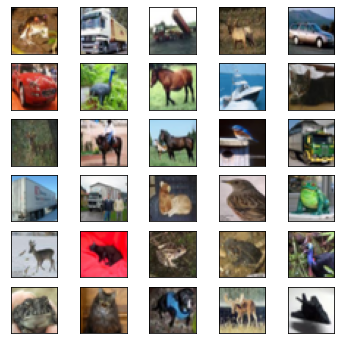

In [4]:
sample_size = 30
random_idx = np.random.randint(33500, size = sample_size)
plt.figure(figsize = (6, 6))


# # 클래스 이름 추출하기
print(type(x_train))
print(type(cifar10))
# # print(cifar10.labels)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


for i, idx in enumerate(random_idx):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
#     plt.xlabel(class_names[t_train[i]])
plt.show()

In [11]:
from tensorflow.keras.utils import to_categorical
x_train = np.reshape(x_train / 255, (-1, 32, 32, 1))
x_test = np.reshape(x_test / 255, (-1, 32, 32, 1))


t_train = to_categorical(t_train)
t_test = to_categorical(t_test)


from sklearn.model_selection import train_test_split
x_train, x_val, t_train, t_val = train_test_split(x_train, t_train, test_size = 0.33, random_state = 777)

ValueError: Found input variables with inconsistent numbers of samples: [150000, 50000]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = Sequential([
    Conv2D(filters = 16, kernel_size = 3, padding = 'same',
          activation = 'relu', input_shape = (32, 32, 3)),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

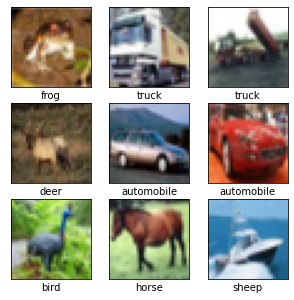

In [17]:
from tensorflow.keras.datasets import cifar10

(x_train,t_train), (x_test, t_test) = cifar10.load_data()

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

sample_size = 9
np.random.seed(777)
class_names=['airplane', 'automobile', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[int(t_train[i])])
    
plt.show()

In [18]:
x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x_train, t_train,
                                                 test_size=0.3)



In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
# pool_size : 커널의 크기, kernel_size처럼 하나의 숫자로 사용할 수 있다.
# strides : 스트라이드 크기. 기본값 = None. 만약 값을 적어주지 않는다면, pool_size와 동일한 크기로 지정
# padding : 데이터의 크기를 동일하게 얻기위해서 사용하는 것
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [20]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

Train on 35000 samples, validate on 15000 samples
Epoch 1/30
35000/35000 [==============================] - 80s 2ms/sample - loss: 1.6312 - acc: 0.4108 - val_loss: 1.3939 - val_acc: 0.4997
Epoch 2/30
35000/35000 [==============================] - 79s 2ms/sample - loss: 1.3047 - acc: 0.5348 - val_loss: 1.2165 - val_acc: 0.5657
Epoch 3/30
35000/35000 [==============================] - 79s 2ms/sample - loss: 1.1391 - acc: 0.6001 - val_loss: 1.1122 - val_acc: 0.6099
Epoch 4/30
35000/35000 [==============================] - 79s 2ms/sample - loss: 1.0088 - acc: 0.6460 - val_loss: 1.0143 - val_acc: 0.6463
Epoch 5/30
35000/35000 [==============================] - 79s 2ms/sample - loss: 0.9152 - acc: 0.6812 - val_loss: 0.9675 - val_acc: 0.6643
Epoch 6/30
35000/35000 [==============================] - 80s 2ms/sample - loss: 0.8379 - acc: 0.7085 - val_loss: 0.9294 - val_acc: 0.6734
Epoch 7/30
35000/35000 [==============================] - 80s 2ms/sample - loss: 0.7725 - acc: 0.7323 - val_loss: 0.

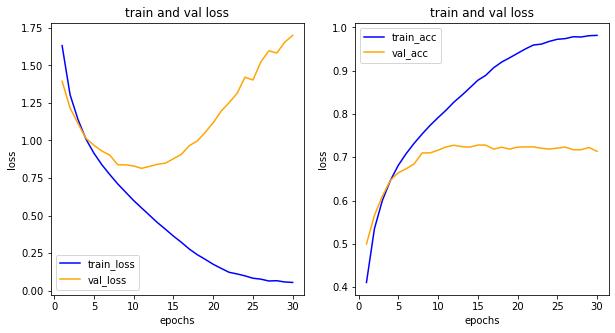

In [21]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


C:\Users\sbs\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


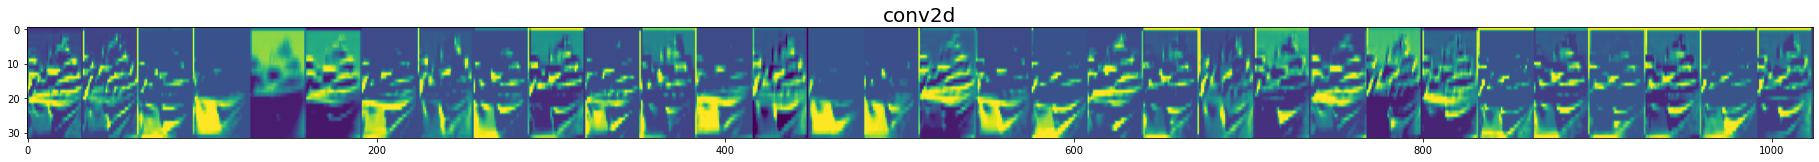

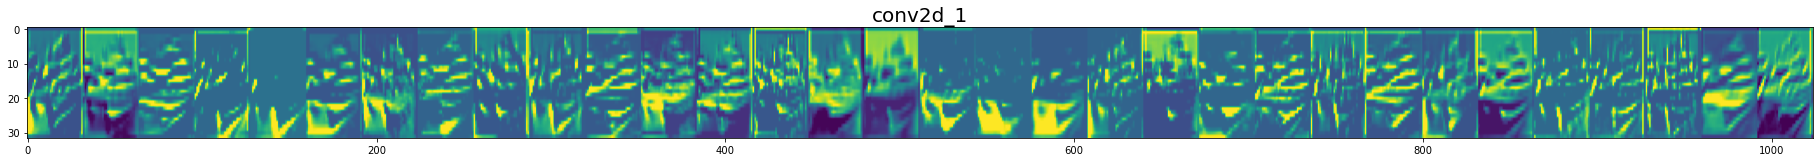

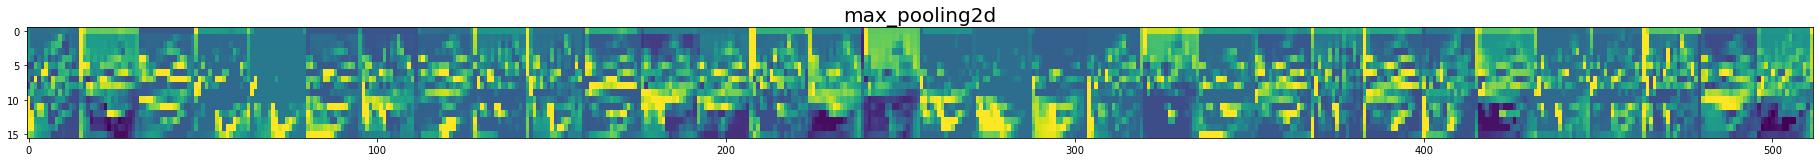

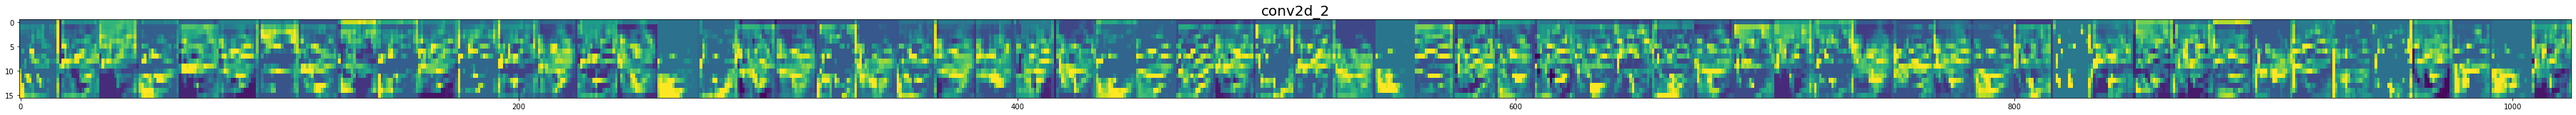

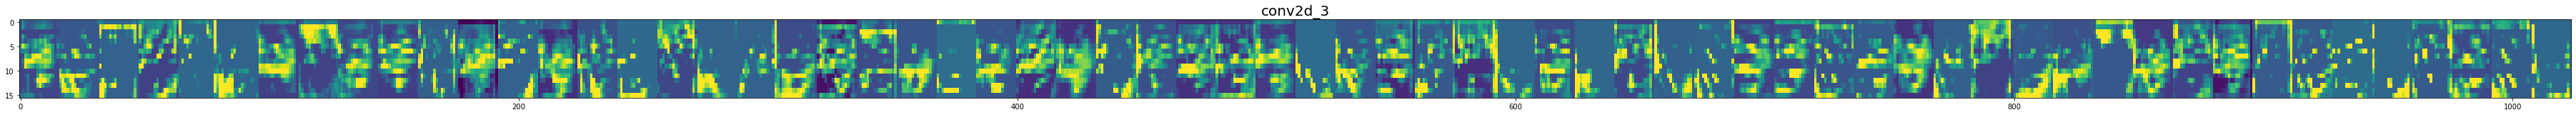

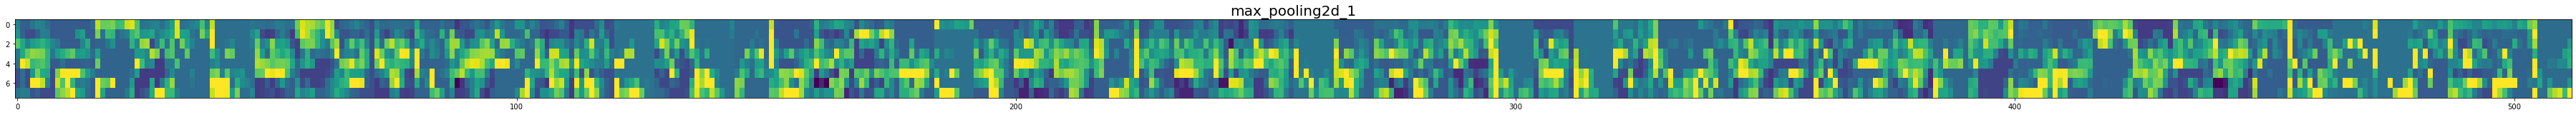

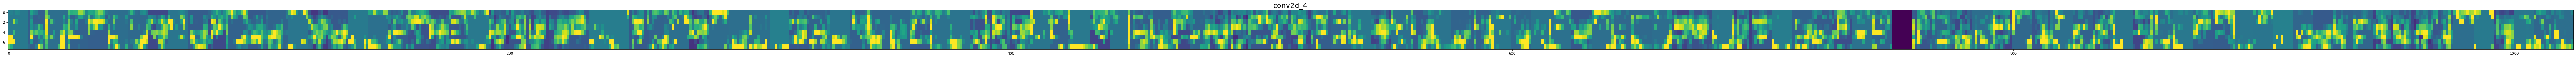

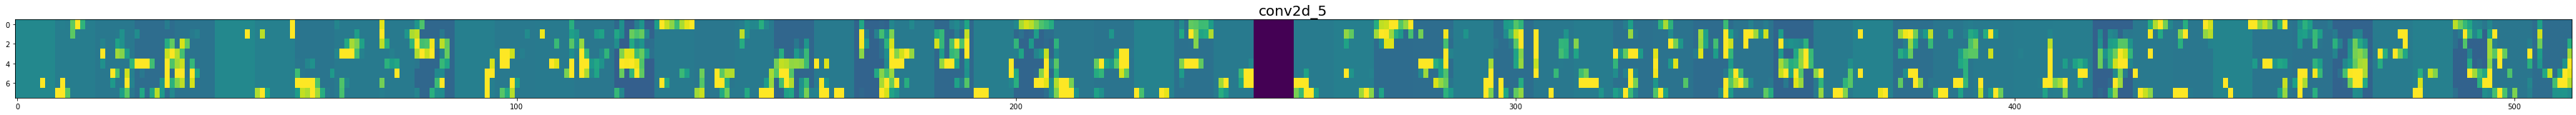

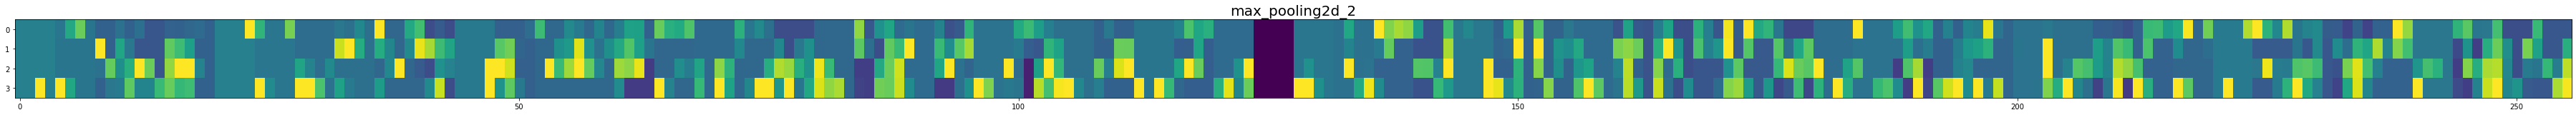

In [22]:
import tensorflow as tf
get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져옵니다.
visual_model = tf.keras.models.Model(inputs=model.input, outputs=get_output)

test_img = np.expand_dims(x_test[1], axis=0)
feature_maps= visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
    if(len(feature_map.shape) == 4):
        img_size = feature_map.shape[1]
        features = feature_map.shape[-1]
        
        display_grid = np.zeros((img_size, img_size * features))
        
        for i in range(features):
            x = feature_map[0, :, :, i]
            x -= x.mean(); x /= x.std()
            x *= 64; x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * img_size : (i + 1) * img_size] = x
        plt.figure(figsize=(features, 2 + 1./features))
        plt.title(layer_name, fontsize=20)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap='viridis')

In [23]:
# 과대적합이 될 가능성이 농후할 경우
# 예방책
# 규제화 함수
# 임의로 모델의 복잡도를 제한시키는 것
# L1노름(가중치의 절대값핪), L2 노름(가중치의 제곱합), 
# L1 + L2 = 엘라스틱넷(혼합(절대값합 + 제곱값))
# 가중치 감쇠
# 기능에 맞게 가중치의 합을 구하여 손실함수에 더하게 됩니다.
# L2의 가중치의 제곱합 + 손실함수

# 규제화 함수 사용한 모델
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', kernel_))


SyntaxError: positional argument follows keyword argument (<ipython-input-23-5d7be7d8d112>, line 18)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regulairzer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'), kernel_reglarizer=l2(0.001))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

TypeError: add() got an unexpected keyword argument 'kernel_regularizer'

In [33]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()


In [ ]:
# 드롭아웃
# 과대적합을 피하기 위해서 사용되는 대표적인 방법 중 하나 입니다.
# 학습이 진행되는 동안 신경망의 일부 유닛을 제외합니다.
# 제외하지 않은 유닛을 집중적으로 학습하게 되면서
# 과대적합 문제를 방지하고 더 나은 성능을 기대할 수 있다.
# 보통 드롭아웃 비율을 0.2 ~ 0.5를 사용합니다.


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensroflow.keras.regularizer import l2



model = Sequential()
#(32, 32, 3)의 데이터를 입력 받습니다.
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same',
                activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regulairzer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same',
                activation='relu'), kernel_regularizer=l2(0.001))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Droupout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'), kernel_reglarizer=l2(0.001))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4),
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [ ]:
history = model.fit(x_train, t_train,
         epochs=30,
         batch_size=32,
         validation_data=(x_val, t_val))

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss,color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax1 = fig.add_subplot(1,2,2)
ax1.plot(epochs, acc, color='blue', label='train_acc')
ax1.plot(epochs, val_acc, color='orange', label='val_acc')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

plt.show()
